# Import libraries

In [58]:
# ! pip install faker 

In [59]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta
from uuid import uuid4
from tqdm import tqdm
from random import randint, uniform
from faker.providers import BaseProvider
import warnings
warnings.simplefilter('ignore')

In [60]:
fake = Faker()
start_date = datetime.strptime("2005-01-01", "%Y-%m-%d")
end_date = datetime.strptime("2023-12-31", "%Y-%m-%d")

In [61]:
def generate_random_id():
    return(uuid4().hex)

# Data generation

## Region

In [62]:
world = pd.read_csv("../Data/worldcities.csv")
cameroon_cities = world[world['country']=='Cameroon']
gabon_cities = world[world['country']=='Gabon'].iloc[:5]
nigeria_cities = world[world['country']=='Nigeria'].iloc[:10]
cities = pd.concat([cameroon_cities, gabon_cities])
cities = pd.concat([cities, nigeria_cities])
print(cities.country.nunique())
print(cities.shape)
cities.head()

3
(102, 11)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
97,Douala,Douala,4.0500,9.7000,Cameroon,CM,CMR,Littoral,admin,5768400.0,1120494607
333,Yaoundé,Yaounde,3.8667,11.5167,Cameroon,CM,CMR,Centre,primary,2440462.0,1120298240
417,Bamenda,Bamenda,5.9614,10.1517,Cameroon,CM,CMR,North-West,admin,2000000.0,1120909610
1249,Garoua,Garoua,9.3000,13.4000,Cameroon,CM,CMR,Nord,admin,600000.0,1120803808
1250,Bafoussam,Bafoussam,5.4667,10.4167,Cameroon,CM,CMR,Ouest,admin,600000.0,1120435460


#### city repartition

In [63]:
# les villes les plus peuplés doivent avoir le plus de transaction

city_top5 = cameroon_cities.head(5)
city_top10 = cameroon_cities.head(10)

## Customer data

In [64]:
from random import randint, uniform
from faker.providers import BaseProvider

class CameroonPhoneProvider(BaseProvider):
    def phone_number(self):
        """Generates a fake Cameroon phone number in a random format."""
        formats = [
            "+237 65ABCDEFG",
            "+237 67ABCDEFG",
            "+237 68ABCDEFG",
            "+237 69ABCDEFG",
        ]
        format_str = formats[randint(0, len(formats) - 1)]
        phone_number = format_str.replace("A", str(randint(0, 9)))
        phone_number = phone_number.replace("B", str(randint(0, 9)))
        phone_number = phone_number.replace("C", str(randint(0, 9)))
        phone_number = phone_number.replace("D", str(randint(0, 9)))
        phone_number = phone_number.replace("E", str(randint(0, 9)))
        phone_number = phone_number.replace("F", str(randint(0, 9)))
        phone_number = phone_number.replace("G", str(randint(0, 9)))
        return phone_number

fake = Faker()
fake.add_provider(CameroonPhoneProvider)

cam_phone_number = fake.phone_number()
print(cam_phone_number)

+237 676821408


In [65]:
# création de la première partie du dataFrame avant d'ajouter la répartition selon les villes
customers_list = []
for i in tqdm(range(10000)):
    first_name = fake.first_name()
    last_name = fake.last_name()
    domain = fake.domain_name()
    email = f"{first_name}.{last_name}@{domain}"
    phone_number = cam_phone_number
    registration_date = fake.date_between(start_date, end_date)
    date_of_birth = fake.date_of_birth(minimum_age=30, maximum_age=75)
    address = fake.address()

    data_dict = {
        'customer_id' :generate_random_id(), 
        'first_name': first_name, 
        'last_name': last_name,
        'email': email,
        'phone_number': phone_number,
        'registration_date': registration_date,
        'date_of_birth' : date_of_birth,
        'address': address,
        }
    customers_list.append(data_dict)
customer_df = pd.DataFrame(customers_list)
print(customer_df.shape)

100%|██████████| 10000/10000 [00:13<00:00, 754.41it/s]


(10000, 8)


In [66]:
# scinder le df pour attribuer le plus de population aux grandes villes
customer_df_1 = customer_df.iloc[:4000]
customer_df_2 = customer_df.iloc[4000:7000].reset_index().drop(columns="index")
customer_df_3 = customer_df.iloc[7000:].reset_index().drop(columns="index")

In [67]:
city_1_list = []
for cust in customer_df_1.iterrows():
    city_1 = random.choice(list(city_top5.city))
    city_1_dict = {
        'city': city_1,
        'region' : cameroon_cities[cameroon_cities.city == city_1]['admin_name'].iloc[0]
    }
    city_1_list.append(city_1_dict)
customer_df_1[["city", "region"]] = pd.DataFrame(city_1_list)
customer_df_1.head()


,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,96c489b3d4d64e21958aec17d58f68fd,Patrick,Fitzgerald,Patrick.Fitzgerald@williams.biz,+237 676821408,2013-09-19,1983-05-19,"02042 Gomez Stream\nReyesfurt, ND 59973",Bafoussam,Ouest
1,91058961f2d24cda859c4c375b588a0a,Scott,Anderson,Scott.Anderson@thomas.com,+237 676821408,2011-01-01,1969-08-18,"52340 Landry Loaf\nBishopbury, FL 62758",Bafoussam,Ouest
2,75b21f61db78424cac985a4295cb1e19,Lonnie,Morales,Lonnie.Morales@ortiz-martin.org,+237 676821408,2019-09-12,1979-09-11,Unit 8230 Box 6994\nDPO AA 72195,Bamenda,North-West
3,91e4745e597a40a6a59e1d6dcd12ef3e,Brian,Sutton,Brian.Sutton@miller-hanson.com,+237 676821408,2011-08-03,1949-03-29,"4597 Michael Viaduct\nEast Ericville, RI 98135",Garoua,Nord
4,74b26ed890474cdb8c9214a4a949cb4e,Brenda,Wilson,Brenda.Wilson@hernandez.com,+237 676821408,2005-12-14,1962-11-03,"786 Baird Islands Apt. 992\nNew Johnborough, A...",Bafoussam,Ouest


In [68]:
city_2_list = []
for cust in customer_df_2.iterrows():
    city_2 = random.choice(list(city_top5.city))
    city_2_dict = {
        'city': city_2,
        'region' : cameroon_cities[cameroon_cities.city == city_2]['admin_name'].iloc[0]
    }
    city_2_list.append(city_2_dict)
customer_df_2[["city", "region"]] = pd.DataFrame(city_2_list)
customer_df_2.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,1138803fd986448c998c9cb7951ea3b9,Crystal,Cline,Crystal.Cline@cabrera.com,+237 676821408,2012-04-27,1970-10-03,"3326 Johnson Summit\nEast Anthonyview, KY 29863",Yaoundé,Centre
1,7be99508c9a7433080171ced535e532d,Wendy,Martin,Wendy.Martin@oliver.net,+237 676821408,2023-08-23,1975-04-29,"230 Cody Terrace\nNorth Joshua, NE 11824",Bamenda,North-West
2,dc51c711bfae4cf09dffe4ac863fb301,Melissa,Shannon,Melissa.Shannon@mitchell.net,+237 676821408,2020-04-20,1990-06-01,"435 David Road\nEast Glenmouth, ME 30934",Yaoundé,Centre
3,26c6eb8f15bf4e8c968301bef87ee3ee,Rhonda,Williams,Rhonda.Williams@jones-mcdaniel.com,+237 676821408,2020-12-04,1974-04-03,"3927 Ross Unions Suite 121\nWest Raymond, WI 7...",Douala,Littoral
4,c551bd76337b46ff82459033f635442f,James,Sanchez,James.Sanchez@valenzuela.org,+237 676821408,2007-02-18,1973-08-17,"44134 Miller Groves Apt. 922\nDavidchester, FM...",Bafoussam,Ouest


In [69]:
city_3_list = []
for cust in customer_df_3.iterrows():
    city_3 = random.choice(list(cities.city))
    city_3_dict = {
        'city': city_3,
        'region' : cities[cities.city == city_3]['admin_name'].iloc[0]
    }
    city_3_list.append(city_3_dict)
customer_df_3[["city", "region"]] = pd.DataFrame(city_3_list)
customer_df_3.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,f210951fb2c14d6ca9fd2b6d5aead1ff,Sabrina,Chavez,Sabrina.Chavez@bruce-alvarado.net,+237 676821408,2015-05-27,1955-06-06,7113 Michael Trafficway Apt. 848\nSouth Madiso...,Balikumbat,North-West
1,a7ce5f0adc5f4227a48840bddd9e1ccc,Eric,Graham,Eric.Graham@bryant.com,+237 676821408,2009-01-20,1986-09-19,USNV Valentine\nFPO AA 70442,Bamessi,North-West
2,2d9d67c5d9ee4131b20c96c17d6b8da8,Raymond,Decker,Raymond.Decker@jackson.com,+237 676821408,2007-10-02,1969-07-04,"PSC 4839, Box 3758\nAPO AP 28250",Bamukumbit,North-West
3,14c751e27c7b42bb89f832641acf9180,Jessica,Russo,Jessica.Russo@williams-miller.net,+237 676821408,2022-10-12,1983-10-04,"5817 Cole Common Suite 916\nDoylefurt, KS 95020",Akonolinga,Centre
4,ee8a803e5e2945cca8b2fe662db304cc,Crystal,Rios,Crystal.Rios@garcia.com,+237 676821408,2008-05-21,1976-05-13,"814 Paul Canyon Apt. 832\nLake Meganfurt, OK 9...",Tibati,Adamaoua


In [70]:
customer_df_final = pd.concat([customer_df_1, customer_df_2, customer_df_3], axis=0)
customer_df_final.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,96c489b3d4d64e21958aec17d58f68fd,Patrick,Fitzgerald,Patrick.Fitzgerald@williams.biz,+237 676821408,2013-09-19,1983-05-19,"02042 Gomez Stream\nReyesfurt, ND 59973",Bafoussam,Ouest
1,91058961f2d24cda859c4c375b588a0a,Scott,Anderson,Scott.Anderson@thomas.com,+237 676821408,2011-01-01,1969-08-18,"52340 Landry Loaf\nBishopbury, FL 62758",Bafoussam,Ouest
2,75b21f61db78424cac985a4295cb1e19,Lonnie,Morales,Lonnie.Morales@ortiz-martin.org,+237 676821408,2019-09-12,1979-09-11,Unit 8230 Box 6994\nDPO AA 72195,Bamenda,North-West
3,91e4745e597a40a6a59e1d6dcd12ef3e,Brian,Sutton,Brian.Sutton@miller-hanson.com,+237 676821408,2011-08-03,1949-03-29,"4597 Michael Viaduct\nEast Ericville, RI 98135",Garoua,Nord
4,74b26ed890474cdb8c9214a4a949cb4e,Brenda,Wilson,Brenda.Wilson@hernandez.com,+237 676821408,2005-12-14,1962-11-03,"786 Baird Islands Apt. 992\nNew Johnborough, A...",Bafoussam,Ouest


In [71]:
customer_df_final.to_csv('../Data/Train/customers.csv', index=False)

## Device data

In [72]:

#creation de id

def create_id():
    return str(uuid4())

#creation des types d'appareils
def generate_device_type():
    return random.choice(['mobile', 'tablette'])

#creation des os

def generate_os():
    return random.choice(['android', 'ios', 'mac', 'windows', 'linux'])

#creation des fabricants
manufacturer_and_model={
                        'dell':['XPS 13', 'INSPIRON 15', 'LATITUDE 7410', 'PRECISION 5550'],
                        'HP': ['spectre x360', 'envy 13', 'pavillon 15', 'OMEN 15'],
                        'LG': ['spectre x3670', 'envy45','Gram 17', 'Wing 5G', ' NanoCell TV'],
                        'SONY':['Xperia 1 III', 'Xperia 5 II', 'Bravia OLDE', 'VAIO SX14'],
                        'Apple':['iphone 13', 'ipad pro', 'iphone Xr'],
                        'Sharp':['Aquos R6', 'aquos sense 5g', ' dynabook v8']
                        }
#def generate_manufacturer():
    #return random.choices(['dell', 'hp', 'lg', 'sony', 'apple', 'sharp', 'lenovo', 'acer', 'tecno','itel', 'huawei', 'samsung', 'google'])

#creation des modeles

def generate_model(type):
    return random.choice(manufacturer_and_model[type])

#creation de la table devices

def create_devices_table(lenght= 100000):

    devices= pd.DataFrame()

    # les listes
    device_id_list=[]
    devices_type_list=[]
    devices_manufacturer_list=[]
    devices_model_list=[]
    devices_last_used_list=[]
    devices_os_list=[]

    #generer les valeurs
    for i in tqdm(range(lenght)):
        devices_id=create_id()
        devices_type= generate_device_type()
        devices_last_used= fake.date_time_between(start_date= '-5y', end_date='now')
        devices_os= generate_os()
        devices_manufacturer= random.choice(list(manufacturer_and_model.keys()))
        devices_model= generate_model(devices_manufacturer)

        #ajout dans les listes
        device_id_list.append(devices_id)
        devices_type_list.append(devices_type)
        devices_model_list.append( devices_model)
        devices_manufacturer_list.append( devices_manufacturer)
        devices_last_used_list.append(devices_last_used)
        devices_os_list.append(devices_os)
        
     #assigner aux colonnes de la table devices
    devices['device_id']= device_id_list
    devices['device_type']= devices_type_list
    devices['os']= devices_os_list
    devices['manufacturer']= devices_manufacturer_list
    devices['model']= devices_model_list
    devices['last_used']= devices_last_used_list

    return devices

devices= create_devices_table()
devices

100%|██████████| 100000/100000 [00:06<00:00, 15041.89it/s]


,device_id,device_type,os,manufacturer,model,last_used
0,4bba132e-1cfb-459a-8f4d-ae5ece3470aa,mobile,linux,Sharp,dynabook v8,2024-03-14 09:11:01
1,6a632d3b-6ff2-427e-9672-827cbe2bf46f,mobile,android,Apple,ipad pro,2021-01-19 15:30:00
2,39f6c884-4cdf-4fbb-b6aa-8a886775959b,mobile,ios,LG,NanoCell TV,2023-03-18 11:55:07
3,ce978d44-5774-4e3f-ba3b-e16359ed1f4c,mobile,android,HP,pavillon 15,2021-08-01 07:47:21
4,6353e85a-84c4-477e-aa95-071b235b4f98,tablette,windows,dell,LATITUDE 7410,2023-12-02 02:30:09
...,...,...,...,...,...,...
99995,522422c6-e3f2-46e2-9255-bba6b022f724,tablette,ios,Sharp,dynabook v8,2022-07-11 23:19:16
99996,12e441c0-03ca-48bf-b70a-b5c995cb66d9,tablette,android,SONY,Xperia 1 III,2024-02-28 22:36:44
99997,ca92617e-3dfc-4990-8a95-b0eb3c5914ce,tablette,linux,HP,envy 13,2020-11-27 01:49:05
99998,4d487980-2189-4edd-bbab-8312e641ae41,tablette,mac,Sharp,aquos sense 5g,2023-12-28 22:59:40


In [73]:
devices.to_csv('../Data/Train/devices.csv', index=False)

## Transaction data

In [74]:
location_list = list(cities.city)
transaction_list=[]
customer_id_list = list(customer_df_final["customer_id"])

def is_fraud_trans(status):
    if status == "échouée":
        return 1
    # elif (amount >= 9500000 and transaction_type in ["depôt", "transfert"]) or (amount >= 10000000 and transaction_type == "retrait"):
    #     return 1
    else:
        return 0

for i in tqdm(range(100000)):
    transaction_id = generate_random_id()
    customer_id = random.choice(customer_id_list)
    transaction_type = random.choices(["retrait", "depôt", "transfert"], weights=[0.25, 0.5, 0.25])[0] # liste pondérée
    # amount = uniform(100, 10000000)
    transaction_date = fake.date_between(start_date, end_date)
    device_id = random.choice(list(devices["device_id"]))
    choices = ["échouée", "réussie"]
    poids = [0.1, 0.9]
    status = random.choices(choices, weights=poids)[0] # liste pondérée

    transaction_dict = {
        "transaction_id": transaction_id,
        "customer_id": customer_id,
        "device_id": device_id,
        "transaction_type": transaction_type,
        # "amount": amount,
        "transaction_date": transaction_date,
        "status": status,
        "is_fraud": is_fraud_trans(status)
    }

    transaction_list.append(transaction_dict)

transaction_df = pd.DataFrame(transaction_list)
print(transaction_df.shape)
transaction_df.head()

100%|██████████| 100000/100000 [23:35<00:00, 70.65it/s] 


(100000, 7)


,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud
0,ab7b9cd5464d4a9a856f84d4bb26c18b,a17f7dd185b54803aea15150ea011820,bbffd9b4-4ad3-4c97-af7f-f4282e1700fb,depôt,2017-04-21,réussie,0
1,3f8d1dbef91d439887da7332eb3c842b,73ad02050a584d999b098d4d9b6c1618,78182518-2d30-45de-9959-a1bc7b8dd6c8,depôt,2007-04-05,réussie,0
2,314c26d9237a4613b18456031e1112c5,1b6658945e6f4e62bbf2c293d4639d0b,3a395d68-9a9f-43c5-8067-1137074d64d5,retrait,2012-09-11,réussie,0
3,acf87855401d4d68b56a34525306d532,6fa8847c85be454ca4301219ea0df722,aa6b66a7-6b1a-4474-bb5a-5ee5757d07a8,retrait,2008-10-01,réussie,0
4,898261e516c54245805db7a5a3135108,f23d3782feaf43ab940bfda549954833,2681484f-0f7e-4a4b-800e-9e29018045e5,retrait,2011-07-18,réussie,0


In [75]:
transaction_df_1 = transaction_df.iloc[:40000]
transaction_df_2 = transaction_df.iloc[40000:70000].reset_index().drop(columns="index")
transaction_df_3 = transaction_df.iloc[70000:].reset_index().drop(columns="index")

In [76]:
location_1_list = []
for trans in transaction_df_1.iterrows():
    location_1 = random.choice(list(city_top5.city))
    location_1_dict = {
        'location': location_1,
    }
    location_1_list.append(location_1_dict)
transaction_df_1[["location"]] = pd.DataFrame(location_1_list)
print(transaction_df_1.isna().sum())
print("\n------------------------------------------------\n")


transaction_id      0
customer_id         0
device_id           0
transaction_type    0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [77]:
location_2_list = []
for trans in transaction_df_2.iterrows():
    location_2 = random.choice(list(city_top10.city))
    location_2_dict = {
        'location': location_2,
    }
    location_2_list.append(location_2_dict)
transaction_df_2[["location"]] = pd.DataFrame(location_2_list)
print(transaction_df_2.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [78]:
location_3_list = []
for trans in transaction_df_3.iterrows():
    location_3 = random.choice(list(cities.city))
    location_3_dict = {
        'location': location_3,
    }
    location_3_list.append(location_3_dict)
transaction_df_3[["location"]] = pd.DataFrame(location_3_list)
print(transaction_df_3.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [79]:
transaction_df_final = pd.concat([transaction_df_1, transaction_df_2, transaction_df_3])
transaction_df_final.shape 

(100000, 8)

In [80]:
transaction_df_final.isna().sum()

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

#### location_fraud

In [81]:
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['location'] not in list(cameroon_cities.city):
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

0it [00:00, ?it/s]

100000it [00:11, 9076.09it/s]


,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location
0,ab7b9cd5464d4a9a856f84d4bb26c18b,a17f7dd185b54803aea15150ea011820,bbffd9b4-4ad3-4c97-af7f-f4282e1700fb,depôt,2017-04-21,réussie,0,Bafoussam
1,3f8d1dbef91d439887da7332eb3c842b,73ad02050a584d999b098d4d9b6c1618,78182518-2d30-45de-9959-a1bc7b8dd6c8,depôt,2007-04-05,réussie,0,Bamenda
2,314c26d9237a4613b18456031e1112c5,1b6658945e6f4e62bbf2c293d4639d0b,3a395d68-9a9f-43c5-8067-1137074d64d5,retrait,2012-09-11,réussie,0,Yaoundé
3,acf87855401d4d68b56a34525306d532,6fa8847c85be454ca4301219ea0df722,aa6b66a7-6b1a-4474-bb5a-5ee5757d07a8,retrait,2008-10-01,réussie,0,Douala
4,898261e516c54245805db7a5a3135108,f23d3782feaf43ab940bfda549954833,2681484f-0f7e-4a4b-800e-9e29018045e5,retrait,2011-07-18,réussie,0,Bafoussam


### device_fraud

In [82]:
selection = pd.DataFrame(transaction_df_final.device_id.value_counts()>=3).reset_index()
device_fraud = list(selection[selection['count']].device_id)
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['device_id'] in device_fraud:
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

100000it [00:50, 1974.67it/s]


,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location
0,ab7b9cd5464d4a9a856f84d4bb26c18b,a17f7dd185b54803aea15150ea011820,bbffd9b4-4ad3-4c97-af7f-f4282e1700fb,depôt,2017-04-21,réussie,0,Bafoussam
1,3f8d1dbef91d439887da7332eb3c842b,73ad02050a584d999b098d4d9b6c1618,78182518-2d30-45de-9959-a1bc7b8dd6c8,depôt,2007-04-05,réussie,0,Bamenda
2,314c26d9237a4613b18456031e1112c5,1b6658945e6f4e62bbf2c293d4639d0b,3a395d68-9a9f-43c5-8067-1137074d64d5,retrait,2012-09-11,réussie,0,Yaoundé
3,acf87855401d4d68b56a34525306d532,6fa8847c85be454ca4301219ea0df722,aa6b66a7-6b1a-4474-bb5a-5ee5757d07a8,retrait,2008-10-01,réussie,0,Douala
4,898261e516c54245805db7a5a3135108,f23d3782feaf43ab940bfda549954833,2681484f-0f7e-4a4b-800e-9e29018045e5,retrait,2011-07-18,réussie,1,Bafoussam


In [83]:
lignes = transaction_df_final.to_numpy().tolist()
random.shuffle(lignes)
lignes[:5]

[['c97933246a82467a9cfb40ab1d612897',
  'bfac7b9b0f9c4c2b92124cf5f9bac2c2',
  'c2e3ea31-d1a5-4d65-a9f8-8b3b733a33b4',
  'transfert',
  datetime.date(2005, 8, 23),
  'réussie',
  0,
  'Buea'],
 ['93fbfd13f9b34e0d9820b8731340aa40',
  'e7506952844a4d38be9379d7580e4c25',
  '2beb8b14-8655-4b71-a925-ef4ba64b2295',
  'retrait',
  datetime.date(2005, 3, 31),
  'réussie',
  1,
  'Douala'],
 ['2ae38ab84eec4dad879cc457ffe0c954',
  '913098ce3c834dbbb199ebdf11ac1955',
  'ef66fa7d-0f58-43dd-aa29-aa9af742a86c',
  'transfert',
  datetime.date(2011, 12, 17),
  'réussie',
  0,
  'Garoua'],
 ['fa94fac99017496b9c8139c474a9b1da',
  '42b6a8b5a41845ceaa50554faaa9610b',
  'd676bb76-3798-49d9-83c6-a7d8d20c4302',
  'depôt',
  datetime.date(2014, 3, 10),
  'réussie',
  1,
  'Yaoundé'],
 ['8bbb805c101b420793a3b51b22766613',
  '5d5cc9db27534a6aaa5434114c6b6c3a',
  'e8a74deb-98e4-46d8-8dd6-57a0beaad69e',
  'retrait',
  datetime.date(2014, 3, 11),
  'échouée',
  1,
  'Douala']]

In [84]:
df = pd.DataFrame(lignes, columns=transaction_df_final.columns)
transaction_df_1 = df.iloc[:70000]
transaction_df_2 = df.iloc[70000:95000].reset_index().drop(columns="index")
transaction_df_3 = df.iloc[95000:].reset_index().drop(columns="index")

list_transac_1 = []
for transac in transaction_df_1.iterrows():
    list_transac_1.append(uniform(100, 100000))
transaction_df_1["amount"] = list_transac_1

list_transac_2 = []
for transac in transaction_df_2.iterrows():
    list_transac_2.append(uniform(100000, 1000000))
transaction_df_2["amount"] = list_transac_2

list_transac_3 = []
for transac in transaction_df_3.iterrows():
    list_transac_3.append(uniform(1000000, 10000000))
transaction_df_3["amount"] = list_transac_3

In [85]:
transaction_df_final = pd.concat([transaction_df_1, transaction_df_2, transaction_df_3])
transaction_df_final.head()

,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location,amount
0,c97933246a82467a9cfb40ab1d612897,bfac7b9b0f9c4c2b92124cf5f9bac2c2,c2e3ea31-d1a5-4d65-a9f8-8b3b733a33b4,transfert,2005-08-23,réussie,0,Buea,39328.354516
1,93fbfd13f9b34e0d9820b8731340aa40,e7506952844a4d38be9379d7580e4c25,2beb8b14-8655-4b71-a925-ef4ba64b2295,retrait,2005-03-31,réussie,1,Douala,29158.648865
2,2ae38ab84eec4dad879cc457ffe0c954,913098ce3c834dbbb199ebdf11ac1955,ef66fa7d-0f58-43dd-aa29-aa9af742a86c,transfert,2011-12-17,réussie,0,Garoua,85552.540513
3,fa94fac99017496b9c8139c474a9b1da,42b6a8b5a41845ceaa50554faaa9610b,d676bb76-3798-49d9-83c6-a7d8d20c4302,depôt,2014-03-10,réussie,1,Yaoundé,79321.951234
4,8bbb805c101b420793a3b51b22766613,5d5cc9db27534a6aaa5434114c6b6c3a,e8a74deb-98e4-46d8-8dd6-57a0beaad69e,retrait,2014-03-11,échouée,1,Douala,4289.345369


In [86]:
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['amount'] >= 7000000:
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

0it [00:00, ?it/s]

100000it [00:10, 9483.66it/s]


,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location,amount
0,c97933246a82467a9cfb40ab1d612897,bfac7b9b0f9c4c2b92124cf5f9bac2c2,c2e3ea31-d1a5-4d65-a9f8-8b3b733a33b4,transfert,2005-08-23,réussie,0,Buea,39328.354516
1,93fbfd13f9b34e0d9820b8731340aa40,e7506952844a4d38be9379d7580e4c25,2beb8b14-8655-4b71-a925-ef4ba64b2295,retrait,2005-03-31,réussie,1,Douala,29158.648865
2,2ae38ab84eec4dad879cc457ffe0c954,913098ce3c834dbbb199ebdf11ac1955,ef66fa7d-0f58-43dd-aa29-aa9af742a86c,transfert,2011-12-17,réussie,0,Garoua,85552.540513
3,fa94fac99017496b9c8139c474a9b1da,42b6a8b5a41845ceaa50554faaa9610b,d676bb76-3798-49d9-83c6-a7d8d20c4302,depôt,2014-03-10,réussie,1,Yaoundé,79321.951234
4,8bbb805c101b420793a3b51b22766613,5d5cc9db27534a6aaa5434114c6b6c3a,e8a74deb-98e4-46d8-8dd6-57a0beaad69e,retrait,2014-03-11,échouée,1,Douala,4289.345369


In [87]:
transaction_df_final.is_fraud.value_counts()

is_fraud
0    66047
1    33953
Name: count, dtype: int64

<Axes: xlabel='is_fraud', ylabel='count'>

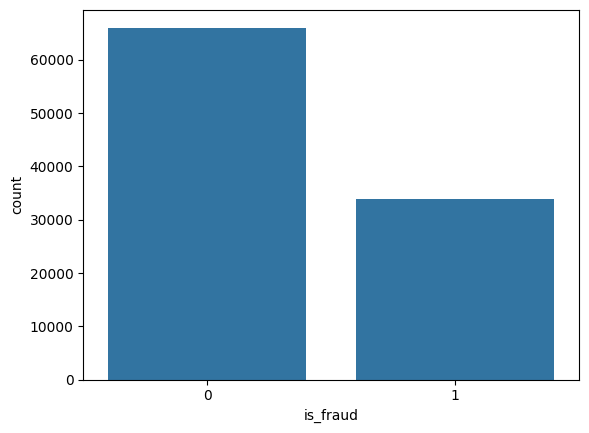

In [88]:
import seaborn as sns
sns.countplot(transaction_df_final, x='is_fraud')

In [89]:
transaction_df_final.to_csv('../Data/Train/transactions.csv', index=False)

## Transaction history data

In [90]:
transaction_history_list = []

for i, transaction in tqdm(transaction_df_final.iterrows()):
    history_id = generate_random_id()
    customer_id = transaction.customer_id
    transaction_id = transaction.transaction_id
    previous_balance = transaction.amount + uniform(0, 10000000)

    if transaction.transaction_type == "depôt":
        new_balance = previous_balance + transaction.amount
    else:
        new_balance = previous_balance - transaction.amount
        
    transaction_date = transaction.transaction_date

    transaction_history_dict = {
        "history_id" : history_id,
        "customer_id" : customer_id,
        "transaction_id" : transaction_id,
        "previous_balance" : previous_balance,
        "new_balance" : new_balance,
        "transaction_date": transaction_date
    }
    transaction_history_list.append(transaction_history_dict)

transaction_history_df = pd.DataFrame(transaction_history_list)
print(transaction_history_df.shape)
transaction_history_df.head()

100000it [00:19, 5059.51it/s]


(100000, 6)


,history_id,customer_id,transaction_id,previous_balance,new_balance,transaction_date
0,951f4864693e44cd9ced936a899a55a8,bfac7b9b0f9c4c2b92124cf5f9bac2c2,c97933246a82467a9cfb40ab1d612897,6.966573e+06,6.927244e+06,2005-08-23
1,fe279af3d2a24d98b85ebea7994ec62a,e7506952844a4d38be9379d7580e4c25,93fbfd13f9b34e0d9820b8731340aa40,8.704516e+06,8.675358e+06,2005-03-31
2,75fa3e3cabd94fa9ac016bd25415c222,913098ce3c834dbbb199ebdf11ac1955,2ae38ab84eec4dad879cc457ffe0c954,7.088040e+06,7.002487e+06,2011-12-17
3,b6fac857a739446db2b26913ee1364b2,42b6a8b5a41845ceaa50554faaa9610b,fa94fac99017496b9c8139c474a9b1da,5.890663e+06,5.969985e+06,2014-03-10
4,e228d6af5e414aa1bc4b9b2f39df17ec,5d5cc9db27534a6aaa5434114c6b6c3a,8bbb805c101b420793a3b51b22766613,2.734736e+06,2.730447e+06,2014-03-11


In [91]:
transaction_history_df.to_csv('../Data/Train/transaction_history.csv', index=False)

## Transaction pattern data

In [92]:
customer_id_list = customer_df["customer_id"]
print(customer_id_list)

0       96c489b3d4d64e21958aec17d58f68fd
1       91058961f2d24cda859c4c375b588a0a
2       75b21f61db78424cac985a4295cb1e19
3       91e4745e597a40a6a59e1d6dcd12ef3e
4       74b26ed890474cdb8c9214a4a949cb4e
                      ...               
9995    77fcaec7e2054f5f902715f314b5688b
9996    edb40e6267434ba1a2e05620bd26246e
9997    385849db72cf4a478ec066f6b230e26a
9998    bdc01fffe8494869a970b161f9743daa
9999    7189d762a4a64502ac01102dfa87e61e
Name: customer_id, Length: 10000, dtype: object


In [93]:
import numpy as np
import pandas as  pd 
import random
from faker import Faker
from uuid import uuid4
from tqdm import tqdm

faker= Faker()

# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer un montant moyen aléatoire
def generate_average_amount():
    return round(random.uniform(5.0, 1000.0), 2)

# Fonction pour générer une fréquence de transactions aléatoire
def generate_frequency():
    return random.randint(1, 30)

# Fonction pour générer une localisation fréquente aléatoire
def generate_most_common_location():
    return faker.city()

# Fonction pour générer un appareil le plus utilisé aléatoire
def generate_most_common_device():
    return random.choice(['mobile', 'tablette'])

# Fonction pour créer une table de transaction patterns
def create_transaction_patterns_table(length=100000):

    transaction_patterns = pd.DataFrame()

    # Les listes
    pattern_id_list = []
    customer_id_list = customer_df["customer_id"].tolist()
    average_amount_list = []
    frequency_list = []
    most_common_location_list = []
    most_common_device_list = []
    foreign_key_list=[]  # liste des cles etrangeres qui seront aleatoirement choisies

    # Générer les valeurs
    for i in tqdm(range(length)):
        pattern_id = create_id()
        customer_id = random.choice(customer_id_list) 
        average_amount = generate_average_amount()
        frequency = generate_frequency()
        most_common_location = generate_most_common_location()
        most_common_device = generate_most_common_device()

        # Ajouter dans les listes
        pattern_id_list.append(pattern_id)
        foreign_key_list.append(customer_id)
        average_amount_list.append(average_amount)
        frequency_list.append(frequency)
        most_common_location_list.append(most_common_location)
        most_common_device_list.append(most_common_device)
    
    # Assigner aux colonnes de la table transaction patterns (en dehors de la boucle)
    transaction_patterns['pattern_id'] = pattern_id_list
    transaction_patterns['customer_id'] = foreign_key_list
    transaction_patterns['average_amount'] = average_amount_list
    transaction_patterns['frequency'] = frequency_list
    transaction_patterns['most_common_location'] = most_common_location_list
    transaction_patterns['most_common_device'] = most_common_device_list

    return transaction_patterns

# Créer une table de transaction patterns
transaction_patterns = create_transaction_patterns_table()

# Afficher les premières lignes de la table transaction patterns
transaction_patterns


100%|██████████| 100000/100000 [00:20<00:00, 4875.80it/s]


,pattern_id,customer_id,average_amount,frequency,most_common_location,most_common_device
0,dd7768da-5d90-4525-81e5-4070d0ef9818,30ccffde2447452bbfc4bfa7dd579f9c,922.07,5,Christianhaven,tablette
1,a6d33f43-dcae-43ff-9fc7-9d6ebec81a6f,944049bfcb8048b0889cf82a9ff0d405,775.84,18,Anthonymouth,mobile
2,e7cf06fe-56b3-4a58-b27c-a0902df53c55,32ab7ae33acd4cbdac832a0e4803bac2,42.05,19,Lake Tinaburgh,mobile
3,cd7f0547-6fc3-41ca-8944-1fd8090f9003,6147a045b05747f383d76b6840a7ab8e,286.28,24,Mcintyreshire,mobile
4,18311d79-63c0-40c9-a2a9-363b9bfe5290,a7c7d222470f41edb43c36d50c82e0d9,687.33,15,Port David,tablette
...,...,...,...,...,...,...
99995,f3bb9f02-a66b-44b7-88b0-0bdbccb06ca7,9b3e89ed32364eaa99465490ff37733e,230.32,25,New Melissashire,tablette
99996,eabd02a8-1291-4635-b010-f78c44147aca,e75986d8ef0a4fbe821d1a9bb2c95649,348.21,28,Mathisburgh,mobile
99997,cd360f16-1ea1-48b5-a5eb-ad4e932e29fd,2281eee036144d79a8f5a21fae03bbd3,498.00,5,New Juanfurt,mobile
99998,324460dd-66b5-4a60-83c9-3c5a688b92bd,8f7a3eb1b03141deb3e8ff5bd5150372,457.37,24,South Jeremiahfort,mobile


In [94]:
transaction_patterns.to_csv('../Data/Train/transaction_patterns.csv', index=False)

## alerts data

In [95]:
# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer une date et heure aléatoire
def generate_alert_date():
    return faker.date_time_between(start_date='-5y', end_date='now')

# Fonction pour générer un type d'alerte aléatoire
def generate_alert_type():
    return random.choice(['suspicious activity', 'large transaction'])

# Fonction pour générer un statut d'alerte aléatoire
def generate_alert_status():
    return random.choice(['open', 'closed'])

# Fonction pour générer une description d'alerte aléatoire
def generate_description():
    return faker.text(max_nb_chars=250)

# Fonction pour créer une table d'alertes
def create_alerts_table(length=100):

    alerts = pd.DataFrame()

    # Les listes
    alert_id_list = []
    transaction_id_list = transaction_df["customer_id"].tolist()
    alert_date_list = []
    alert_type_list = []
    alert_status_list = []
    description_list = []
    foreign_key_alerts_list=[]

    # Générer les valeurs
    for i in tqdm(range(length)):
        alert_id = create_id()
        transaction_id = random.choice(transaction_id_list) # Remplacer par un identifiant de transaction réel si disponible
        alert_date = generate_alert_date()
        alert_type = generate_alert_type()
        alert_status = generate_alert_status()
        description = generate_description()

        # Ajouter dans les listes
        alert_id_list.append(alert_id)
        foreign_key_alerts_list.append(transaction_id)
        alert_date_list.append(alert_date)
        alert_type_list.append(alert_type)
        alert_status_list.append(alert_status)
        description_list.append(description)
    
    # Assigner aux colonnes de la table alerts (en dehors de la boucle)
    alerts['alert_id'] = alert_id_list
    alerts['transaction_id'] = foreign_key_alerts_list
    alerts['alert_date'] = alert_date_list
    alerts['alert_type'] = alert_type_list
    alerts['alert_status'] = alert_status_list
    alerts['description'] = description_list

    return alerts

# Créer une table d'alertes
alerts = create_alerts_table()

# Afficher les premières lignes de la table alerts
alerts

100%|██████████| 100/100 [00:00<00:00, 2709.43it/s]


,alert_id,transaction_id,alert_date,alert_type,alert_status,description
0,5103e3bb-89fe-40b0-b41e-884f5d429de9,c6a1dae273af453997d3920c91021c17,2020-04-22 14:22:18,large transaction,closed,Either pattern bag maintain speak. Effort spec...
1,837cd408-c77e-486b-8677-5355ede1abd4,180fcd3f2cad47dda838c51b0d5bd912,2023-09-14 09:32:23,suspicious activity,open,Job memory military soldier. Method find light...
2,6530686c-423e-45c7-add2-634c8e070db2,b92e9b5e1bf5461fa6cc9bebd5813590,2019-08-24 18:25:35,large transaction,open,Walk near character wish run.\nSomebody severa...
3,29d159e0-7a13-47f9-b123-70d124808954,cb4662d685ed47138dbe555df4a2fc67,2019-12-27 07:30:53,large transaction,closed,Around attack detail section admit quite who s...
4,2f2a34aa-2757-4306-a2b5-bf20311cdc92,3fbd5b1694f6424ba8b2eff11171ed60,2019-08-25 13:18:20,large transaction,open,Well full cover perhaps coach. Actually size s...
...,...,...,...,...,...,...
95,37b44017-543b-4c42-8c81-47de3b17b977,9f4f5c8157434fc1b10cafb097c97158,2023-12-13 22:46:44,large transaction,open,Follow star sea. Watch its protect. Able every...
96,4302db27-7a60-44df-965c-dd3e22011d5b,abe5fef48c9e47b8bf6e10cd1f2852bd,2024-04-03 06:38:32,large transaction,closed,Analysis range let forward campaign. Interesti...
97,21cbc89c-7751-4068-851c-1f47950cd8f8,e56e7e8c1ac24f2dae898a15c8847525,2022-08-04 02:16:28,large transaction,open,Ok mention catch character. Those your stand s...
98,b10db812-32c1-4601-9aad-4947f6eb1c5c,2036e93602074268b9116895ebf803dd,2019-12-27 13:21:58,suspicious activity,open,Understand fire least per its. Participant tea...


In [96]:
alerts.to_csv('../Data/Train/alerts.csv', index=False)

## fraude_cases data 

In [97]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
import uuid 
from faker import Faker
from datetime import datetime, timedelta


In [98]:


def generate_ID():
  return str(uuid.uuid1())


    
transaction_id_list = transaction_df["transaction_id"].tolist()
customer_id_list = customer_df["customer_id"].tolist()
                         
    
    


In [99]:
nb = 1000
generate_id_case = [generate_ID() for i in tqdm(range(nb))]
generate_id_transaction = [random.choice([transaction_id_list]) for i in tqdm(range(nb))]
generate_id_customer = [random.choice(customer_id_list) for i in tqdm(range(nb))]

#generation des données 
Data = {
  "case_id" : generate_id_case,
  "transaction_id" : generate_id_transaction,
  "customer_id" : generate_id_customer,
  "fraud_type" :[random.choice(["identity theft"," account takeover"]) for i in tqdm(range(nb))],
  "detection_Date" : [fake.date_between(start_date, end_date) for i in tqdm(range(nb))],
  "resolution_status" : [random.choice(["pending", "resolved"]) for i in tqdm(range(nb))],
  "comment_fraud" : [ fake.text(50) for i in tqdm(range(nb))],
}


100%|██████████| 1000/1000 [00:00<00:00, 23075.42it/s]


In [100]:
fraud_df = pd.DataFrame(Data)
print(fraud_df.shape)
fraud_df.head()


(1000, 7)


,case_id,transaction_id,customer_id,fraud_type,detection_Date,resolution_status,comment_fraud
0,fc09449b-443c-11ef-8624-9cb6d0da64b6,"[ab7b9cd5464d4a9a856f84d4bb26c18b, 3f8d1dbef91...",59b0f7a108304efc8392bf98189c113b,identity theft,2011-12-10,pending,Himself might building federal successful.
1,fc09449c-443c-11ef-b293-9cb6d0da64b6,"[ab7b9cd5464d4a9a856f84d4bb26c18b, 3f8d1dbef91...",bf595c9a44d74a74afee95d8d93f514b,account takeover,2007-08-27,resolved,Involve fill husband data.
2,fc09449d-443c-11ef-8d77-9cb6d0da64b6,"[ab7b9cd5464d4a9a856f84d4bb26c18b, 3f8d1dbef91...",996b69e4ffc64b6d818d465d498780d4,identity theft,2010-11-07,resolved,One professional can between.
3,fc09449e-443c-11ef-af16-9cb6d0da64b6,"[ab7b9cd5464d4a9a856f84d4bb26c18b, 3f8d1dbef91...",cefda99c72b04e5596d2275b1ca8db69,identity theft,2005-02-24,pending,Quickly but small report treat.
4,fc09449f-443c-11ef-991f-9cb6d0da64b6,"[ab7b9cd5464d4a9a856f84d4bb26c18b, 3f8d1dbef91...",83347cf114cf4af883d765f43338e8ce,account takeover,2018-12-08,resolved,Across choose fish rest across. Born not around.


## regions data

In [101]:
from glob import glob

list_data = glob('../Data/Train/*')
print(list_data)


['../Data/Train\\alerts.csv', '../Data/Train\\customers.csv', '../Data/Train\\devices.csv', '../Data/Train\\transactions.csv', '../Data/Train\\transaction_history.csv', '../Data/Train\\transaction_patterns.csv']


In [102]:
import os 
os.sep

'\\'

In [103]:
list_data[0].split(os.sep)[-1].split('.')[0]

'alerts'